#Лаб 1. Кластеризация

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Набор данных - http://archive.ics.uci.edu/ml/datasets/Chemical+Composition+of+Ceramic+Samples

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df = pd.read_csv('/content/drive/MyDrive/6 сем/обработка данных/Лаб 1/Chemical Composion of Ceramic.csv', header=0)
df.head(5)

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


##Анализ предметной области

Датасет содержит состав и описание керамики.

Ceramic.Name: название типов керамики из Лунцюань и Цзиндэчжэнь

Part: бинарная категориальная переменная («Body» или «Glaze»)

Na2O: процентное содержание Na2O (мас. %)

MgO: процентное содержание MgO (мас. %)

Al2O3: процентное содержание Al2O3 (мас. %)

SiO2: процентное содержание SiO2 (мас. %)

K2O: процентное содержание K2O (мас. %)

CaO: процентное содержание CaO (мас. %)

TiO2: процентное содержание TiO2 (мас. %)

Fe2O3: процентное содержание Fe2O3 (мас. %)

MnO: процентное содержание MnO (ppm)

CuO: процентное содержание CuO (ppm)

ZnO: процентное содержание ZnO (ppm)

PbO2: процентное содержание PbO2 (ppm)

Rb2O: процентное содержание Rb2O (ppm)

SrO: процентное содержание SrO (ppm)

Y2O3: процентное содержание Y2O3 (ppm)

ZrO2: процентное содержание ZrO2 (ppm)

P2O5: процентное содержание P2O5 (ppm)

 Керамика из Лунцюань и Цзиндэчжэнь отличается по истории, технологиям производства, стилю и назначению.
 Эти два города являются одними из самых значимых центров керамического искусства в Китае, каждый из которых имеет уникальные традиции.

 Основное различие между керамикой Лунцюань и Цзиндэчжэнь заключается в типе продукции: Лунцюань известен своей селадоновой керамикой,
 а Цзиндэчжэнь — тонким белым фарфором. Также они различаются по использованным технологиям, цветам глазури и стилю изделий.


Термины "body" и "glaze" относятся к различным частям изделия:

Body (Тело): Это основная масса или структура керамического изделия. Тело может состоять из глины или смеси различных материалов, которые формируют форму изделия, будь то чашка, ваза или тарелка. Именно тело придает изделию его форму и прочность после обжига. Состав тела керамики может включать различные оксиды и другие добавки, которые влияют на его цвет, плотность, термическую стойкость и другие свойства.

Glaze (Глазурь): Это стекловидное покрытие, которое наносится на поверхность керамического изделия и затем обжигается. Глазурь придает изделию гладкую, блестящую поверхность и может быть прозрачной, непрозрачной, цветной или бесцветной. Глазури защищают тело керамики от проникновения воды, улучшают эстетические свойства изделия и придают ему дополнительные функциональные характеристики, такие как устойчивость к химическим воздействиям или прочность.

# Анализ датасета

## Зависимость Part от состава

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

NaN нет.

In [92]:
df['Ceramic Name'].value_counts()

,count
Ceramic Name,
FLQ-1-b,1
FLQ-2-b,1
DY-NS-1-g,1
DY-BS-7-g,1
DY-BS-6-g,1
...,...
DY-NS-8-b,1
DY-NS-7-b,1
DY-NS-6-b,1


In [93]:
duplicates = df['Ceramic Name'].value_counts()
duplicates[duplicates > 1]

,count
Ceramic Name,


Все имена уникальны, повторений нет.

In [94]:
df['Part'].value_counts()

,count
Part,
Body,44
Glaze,44


In [95]:
df.describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.10125,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,228.863636,42.954545,145.454545,440.909091
std,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.05343,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.216646,12.879556,60.074840,402.653944
min,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.04000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,-10.000000,20.000000,50.000000,50.000000
25%,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.07000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000
50%,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.08000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000
75%,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.13000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000
max,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.29000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000


Сделаем label encoding столбца Part.

In [96]:
part_mapping = {part: index for index, part in enumerate(df['Part'].unique())}

df['Part'] = df['Part'].map(part_mapping)

print(df[['Part']].head())

print("\nМаппинг:")
print(part_mapping)

   Part
0     0
1     0
2     0
3     0
4     0

Маппинг:
{'Body': 0, 'Glaze': 1}


In [97]:
df_nums = df.drop(['Ceramic Name'], axis=1)

<Axes: >

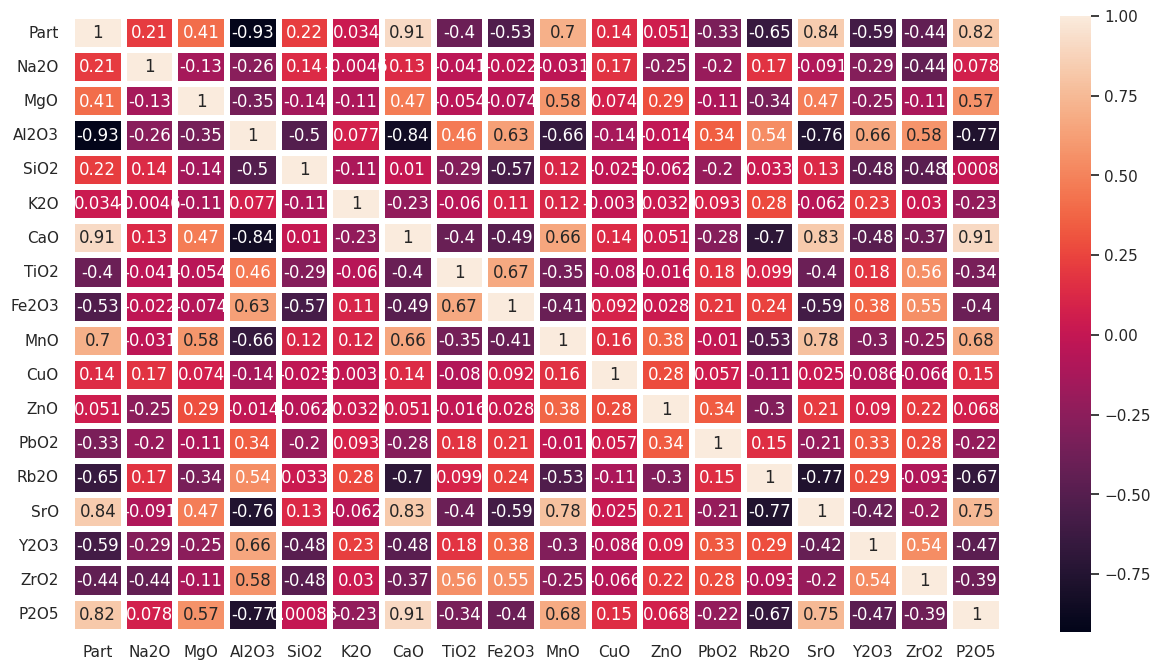

In [98]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_nums.corr(), annot=True, linewidths=3, cbar=True)

### Возможные выводы:

- Если Part = 0 соответствует "Body", а 1 - "Glaze", то корреляция 0.91 может указывать на то, что глазури содержат значительно больше CaO, чем тела керамических изделий.
Это соответствует обычной практике в керамике, где CaO чаще используется в больших количествах в глазурях.
- Аналогично с MnO, SrO, P2O5 - корреляция соответственно 0.7, 0.84, 0.82.
- Коореляция -0.93 может указывать на то, что тела керамических изделий содержат значительно больше Al2O3, чем глазури.

Легенда:

голубой - первый и третий квартили

красный - медиана

желтый - среднее



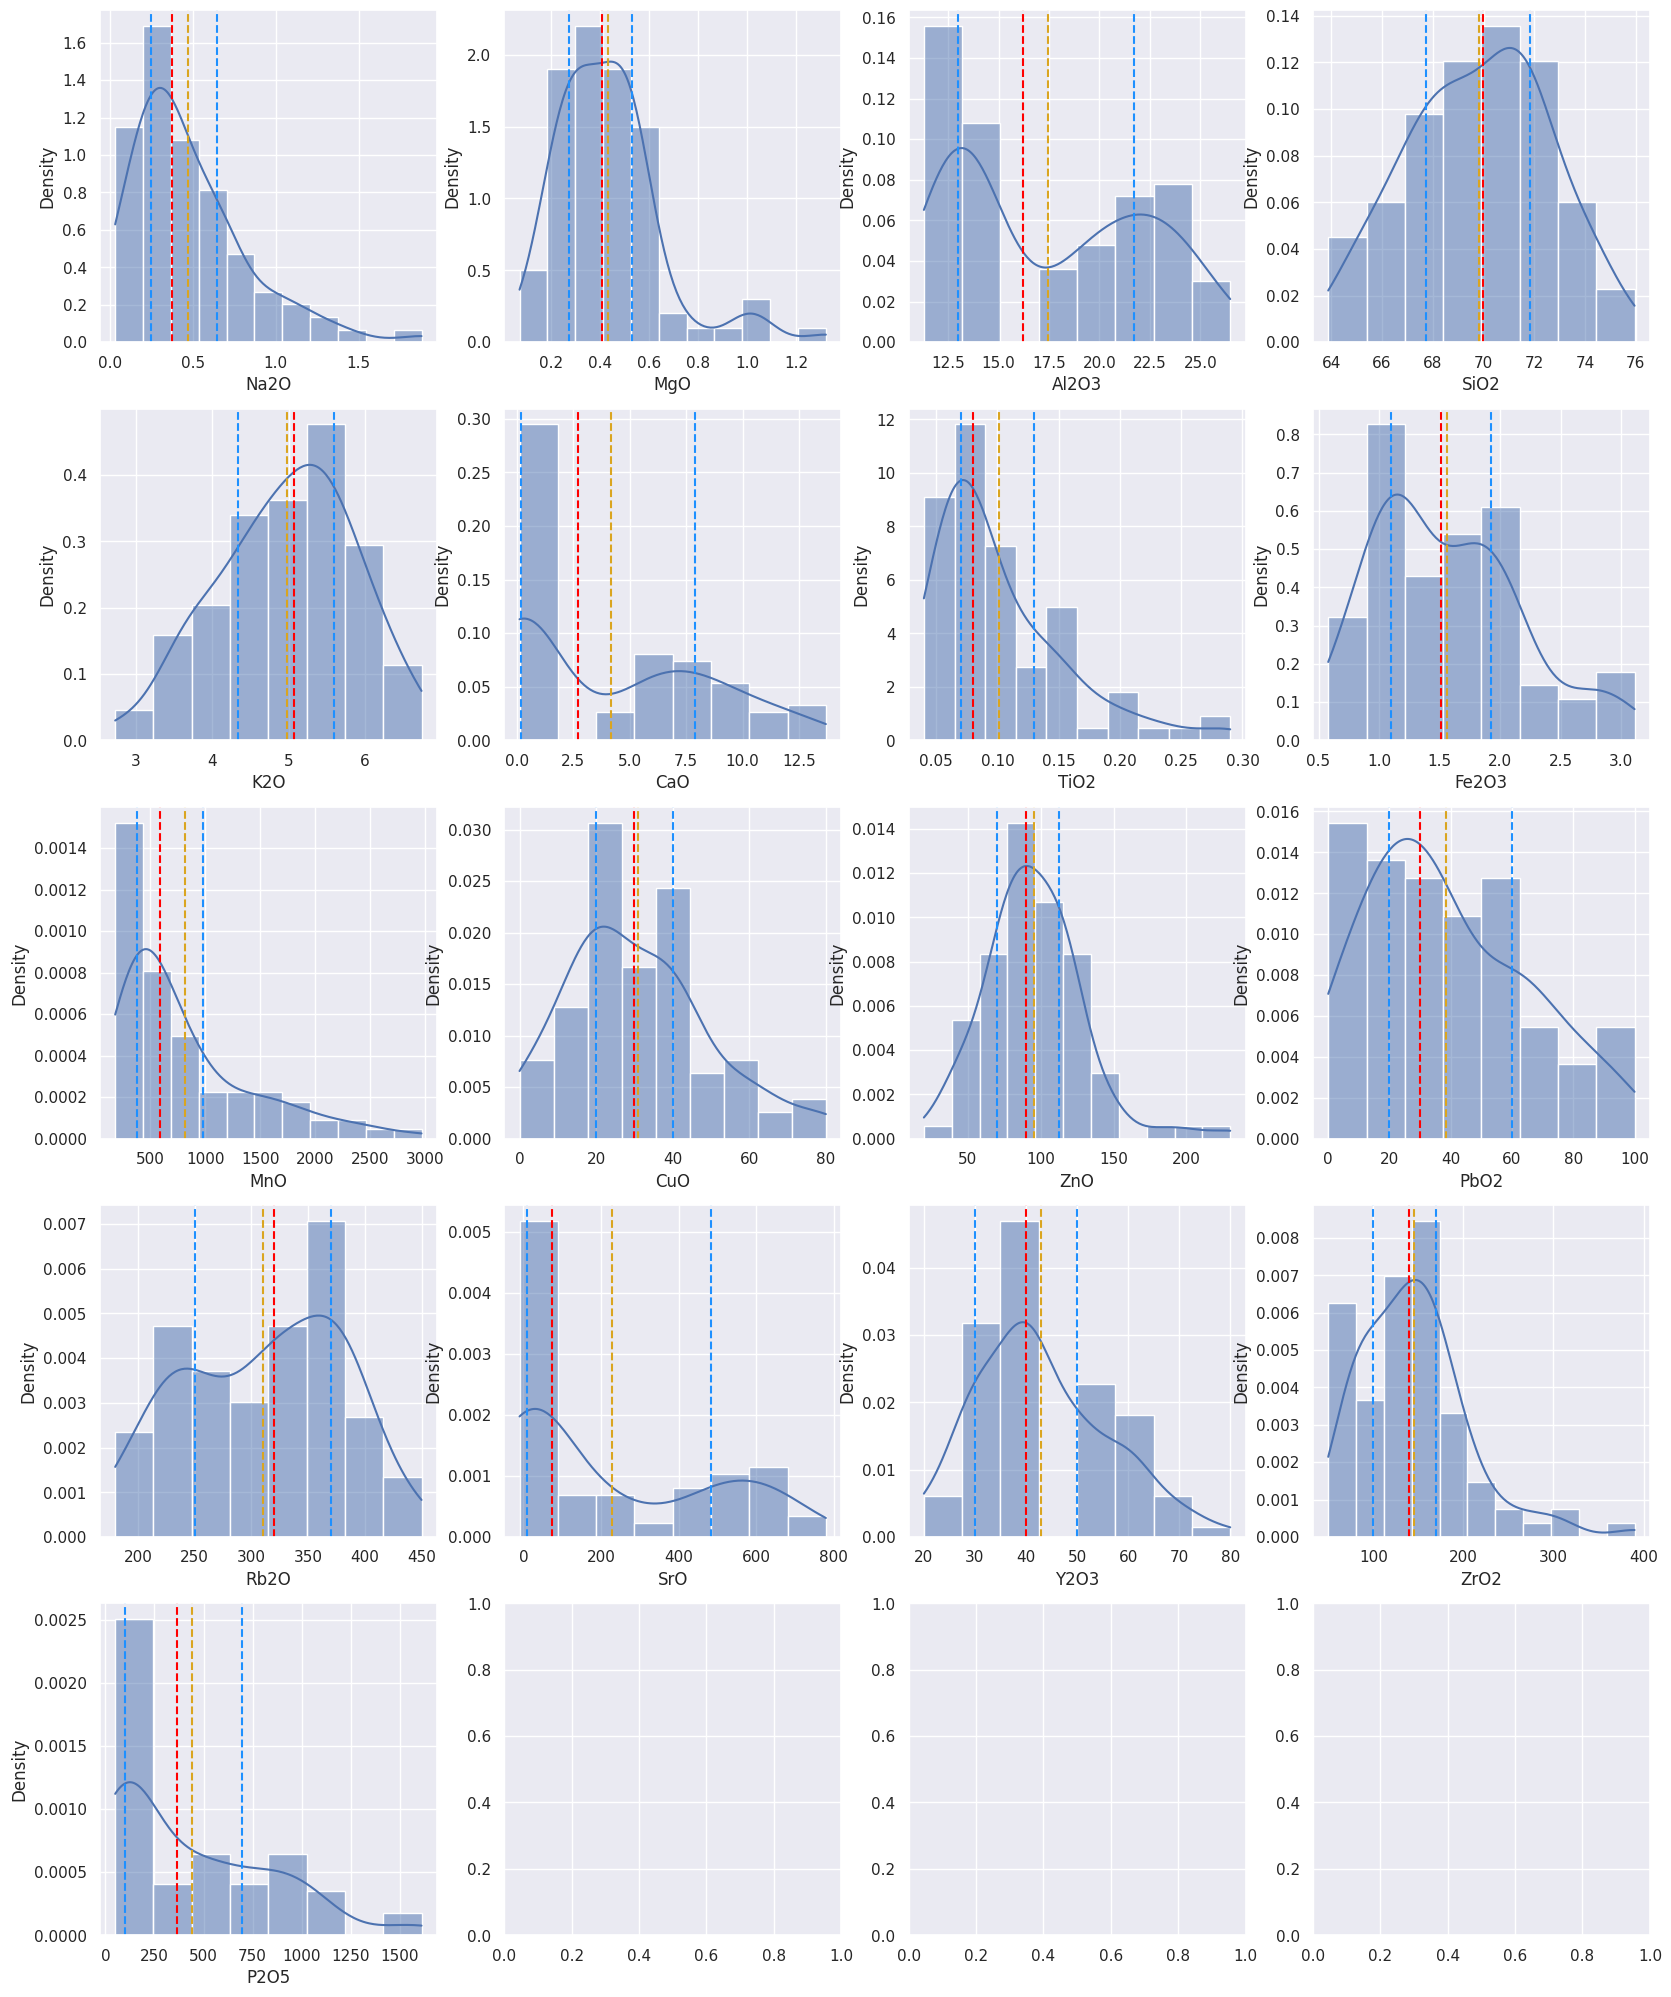

In [99]:
print("Легенда:\n")
print("голубой - первый и третий квартили\n")
print("красный - медиана\n")
print("желтый - среднее\n")

rows, columns = df.shape

if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20, int(columns // 4) * 5))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20, (int(columns // 4) + 1) * 5))

i = 0
j = 0

features = df.head(0).iloc[:, 2:]

for column in features:
    if j == 4:
        j = 0
        i += 1

    sns.histplot(df[column], ax=ax[i, j], kde=True, stat="density")

    ax[i, j].axvline(df[column].quantile(0.25), color="dodgerblue", ls='--')
    ax[i, j].axvline(df[column].quantile(0.5), color="red", ls='--')
    ax[i, j].axvline(df[column].mean(), color="goldenrod", ls='--')
    ax[i, j].axvline(df[column].quantile(0.75), color="dodgerblue", ls='--')

    j += 1

Кроме CaO и SrO, разница между медианой и средним у всех элементов небольшая, значит выбросы минимальны.

## Анализ имён экземляров керамики

Как говорилось ранее, все имена уникальны.

In [100]:
df['Ceramic Name'].tolist()

['FLQ-1-b',
 'FLQ-2-b',
 'FLQ-3-b',
 'FLQ-4-b',
 'FLQ-5-b',
 'FLQ-6-b',
 'FLQ-7-b',
 'FLQ-8-b',
 'FLQ-9-b',
 'FLQ-10-b',
 'FLQ-11-b',
 'FLQ-12-b',
 'FLQ-13-b',
 'DY-BS-1-b',
 'DY-BS-2-b',
 'DY-BS-3-b',
 'DY-BS-4-b',
 'DY-BS-5-b',
 'DY-BS-6-b',
 'DY-BS-7-b',
 'DY-NS-1-b',
 'DY-NS-2-b',
 'DY-NS-3-b',
 'DY-NS-4-b',
 'DY-NS-5-b',
 'DY-NS-6-b',
 'DY-NS-7-b',
 'DY-NS-8-b',
 'DY-Y-1-b',
 'DY-Y-2-b',
 'DY-Y-3-b',
 'DY-Y-4-b',
 'DY-Y-5-b',
 'DY-Y-6-b',
 'DY-Y-7-b',
 'DY-Y-8-b',
 'DY-Y-9-b',
 'DY-M-1-b',
 'DY-M-2-b',
 'DY-M-3-b',
 'DY-QC-1-b',
 'DY-QC-2-b',
 'DY-QC-3-b',
 'DY-QC-4-b',
 'FLQ-1-g',
 'FLQ-2-g',
 'FLQ-3-g',
 'FLQ-4-g',
 'FLQ-5-g',
 'FLQ-6-g',
 'FLQ-7-g',
 'FLQ-8-g',
 'FLQ-9-g',
 'FLQ-10-g',
 'FLQ-11-g',
 'FLQ-12-g',
 'FLQ-13-g',
 'DY-BS-1-g',
 'DY-BS-2-g',
 'DY-BS-3-g',
 'DY-BS-4-g',
 'DY-BS-5-g',
 'DY-BS-6-g',
 'DY-BS-7-g',
 'DY-NS-1-g',
 'DY-NS-2-g',
 'DY-NS-3-g',
 'DY-NS-4-g',
 'DY-NS-5-g',
 'DY-NS-6-g',
 'DY-NS-7-g',
 'DY-NS-8-g',
 'DY-Y-1-g',
 'DY-Y-2-g',
 'DY-Y-3-g',
 'DY-Y-4-

1. Структура имен:

- Имена состоят из нескольких частей, разделенных дефисами.
- Первая часть (например, FLQ, DY) может обозначать тип или серию керамики.
- Вторая часть (например, BS, NS, Y, M, QC) может указывать на подтип или конкретную коллекцию.
- Числовая часть, вероятно, обозначает номер образца в серии.
- Последняя буква может обозначать часть керамики: b - body, g - glaze.

2. Можно выделить следующие основные группы:

- FLQ: образцы от FLQ-1 до FLQ-13
- DY-BS: образцы DY-BS от 1 до 7
- DY-NS: образцы DY-NS от 1 до 8
- DY-Y: образцы DY-Y от 1 до 9
- DY-M: образцы DY-M от 1 до 3
- DY-QC: образцы DY-QC от 1 до 4


3. Особенности:

Каждый образец представлен дважды: один раз с суффиксом '-b' (тело) и один раз с '-g' (глазурь).
Это соответствует бинарной переменной Part.

Добавим в датасет метки принадлежности к группам.

In [101]:
def parse_ceramic_name(name):
    parts = name.split('-')
    main_type = parts[0]
    if main_type == 'FLQ':
        return main_type, '', int(parts[1])
    else:
        return main_type, parts[1], int(parts[2])

df[['Main Type', 'Sub Type', 'Sample Number']] = df['Ceramic Name'].apply(lambda x: pd.Series(parse_ceramic_name(x)))

df['Sample Number'] = df['Sample Number'].astype(int)

In [102]:
subtypes = ['BS', 'NS', 'Y', 'M', 'QC']

df['Is_FLQ'] = (df['Main Type'] == 'FLQ').astype(int)

for subtype in subtypes:
    df[f'Is_DY_{subtype}'] = (df['Sub Type'] == subtype).astype(int)

In [103]:
df = df.drop(['Main Type', 'Sub Type'], axis=1)

In [104]:
df.sample(n=6)

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,...,Y2O3,ZrO2,P2O5,Sample Number,Is_FLQ,Is_DY_BS,Is_DY_NS,Is_DY_Y,Is_DY_M,Is_DY_QC
44,FLQ-1-g,1,0.97,0.07,11.42,74.41,5.70,5.34,0.05,1.04,...,20,50,390,1,1,0,0,0,0,0
47,FLQ-4-g,1,0.14,0.41,12.42,67.24,4.29,12.86,0.06,1.58,...,40,70,1000,4,1,0,0,0,0,0
4,FLQ-5-b,0,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,...,30,80,150,5,1,0,0,0,0,0
55,FLQ-12-g,1,1.29,0.32,12.83,68.81,5.80,7.92,0.07,1.97,...,40,70,540,12,1,0,0,0,0,0
26,DY-NS-7-b,0,0.34,0.47,22.48,67.80,5.45,0.49,0.14,1.83,...,60,170,120,7,0,0,1,0,0,0
64,DY-NS-1-g,1,0.20,0.53,12.83,72.24,5.03,6.92,0.07,1.18,...,40,130,650,1,0,0,1,0,0,0


In [105]:
df_nums = df.drop(['Ceramic Name'], axis=1)

<Axes: >

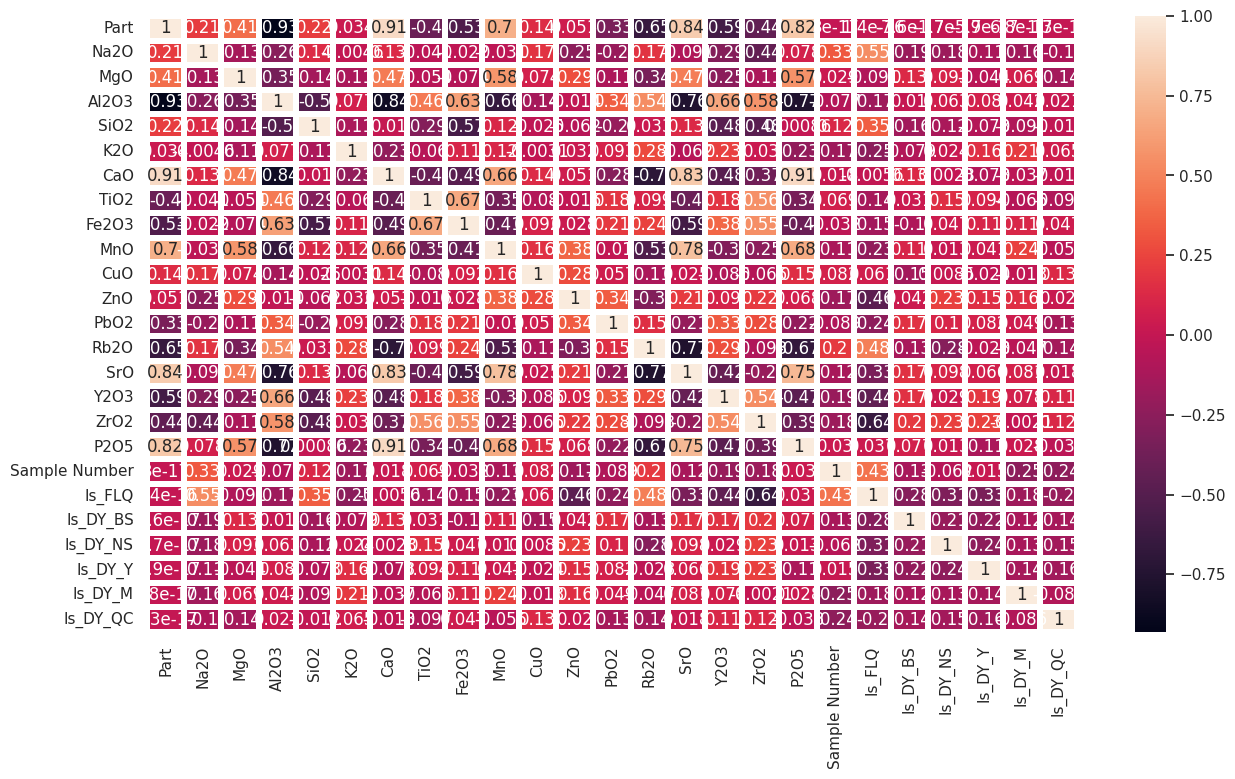

In [106]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_nums.corr(), annot=True, linewidths=3, cbar=True)

Очевидных зависимостей групп с составом не видно.

In [107]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def fit_model_and_get_importances(X, Y, is_classifier):

    if is_classifier:
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)

    model.fit(X, Y)

    feature_importances = pd.Series(model.feature_importances_, index=X.columns)

    return feature_importances


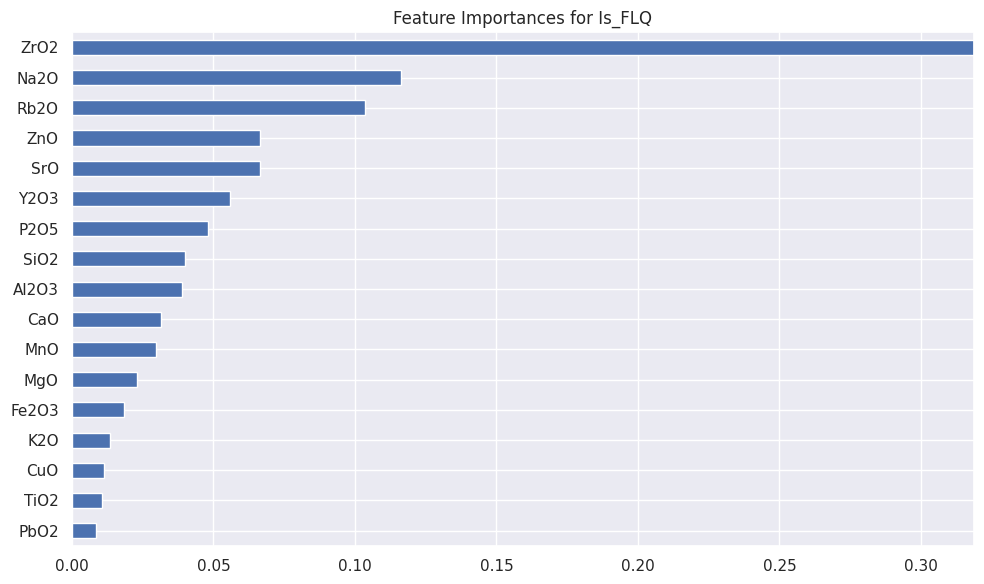

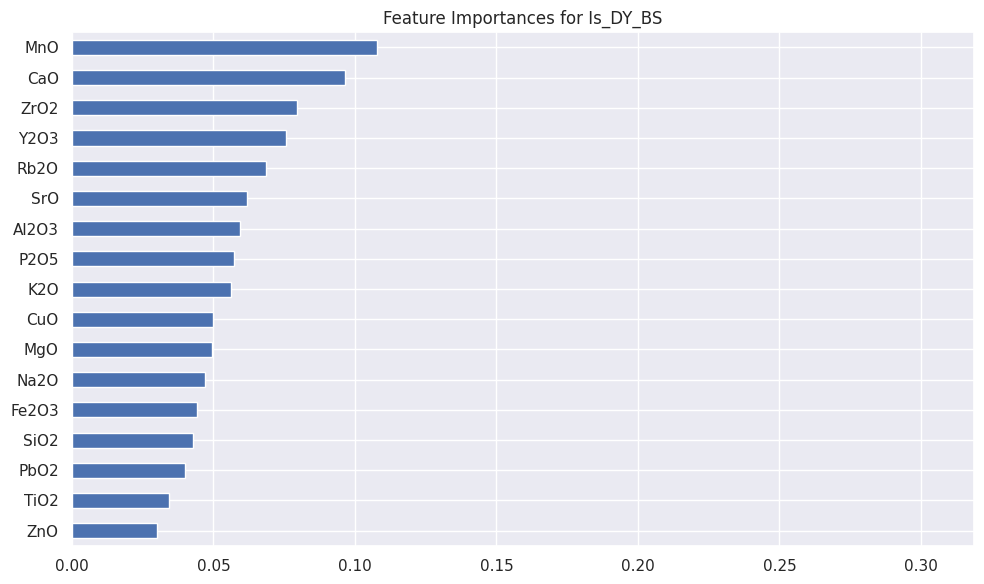

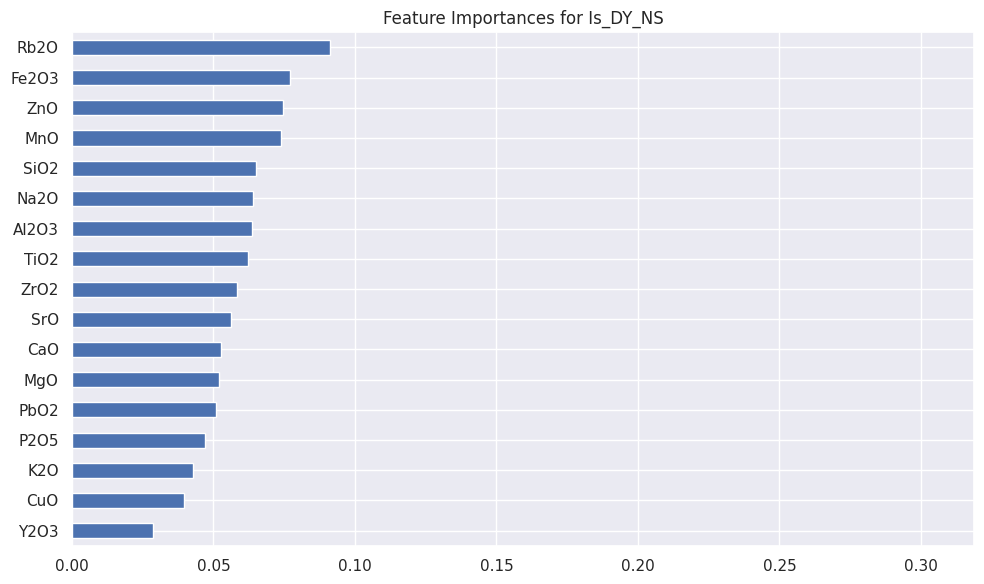

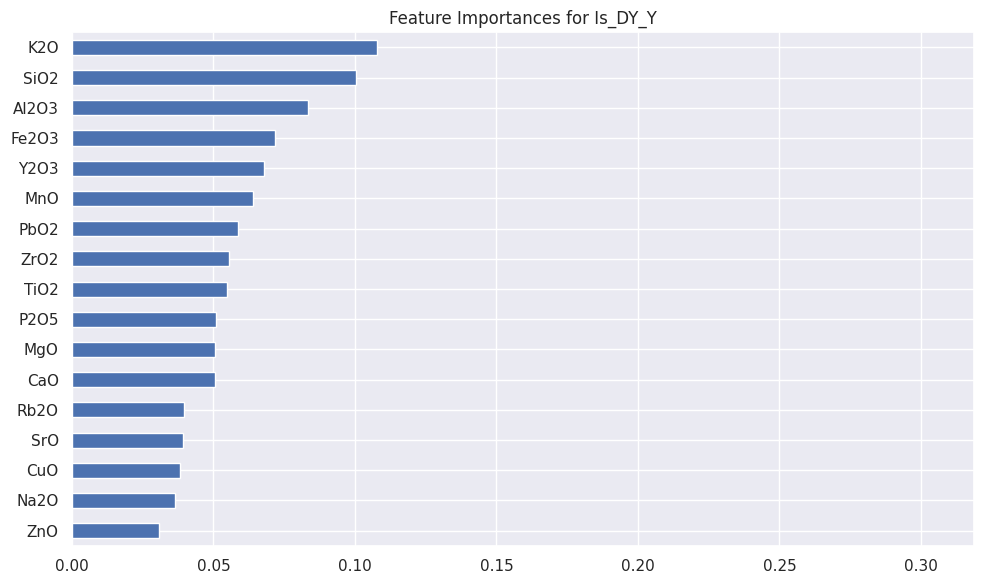

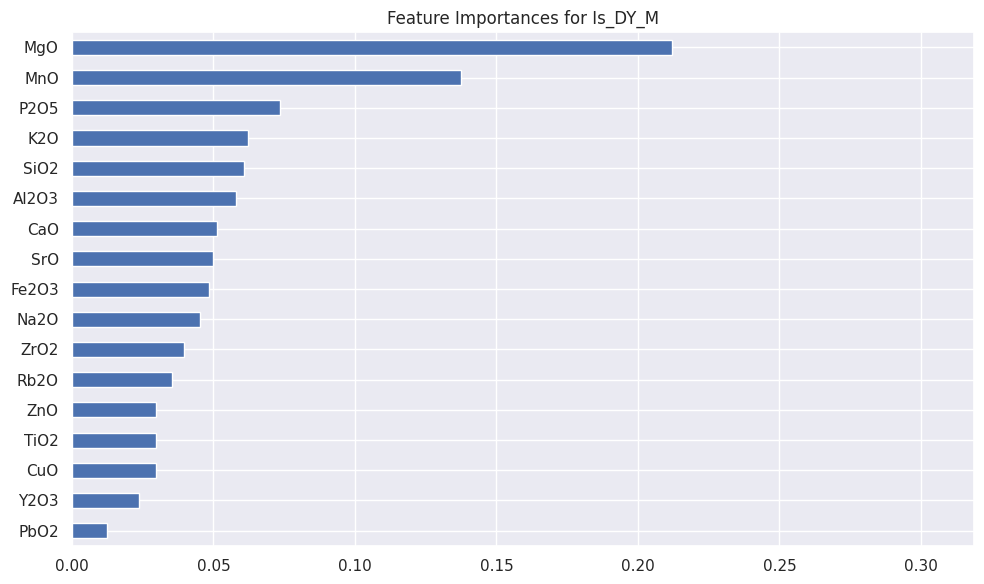

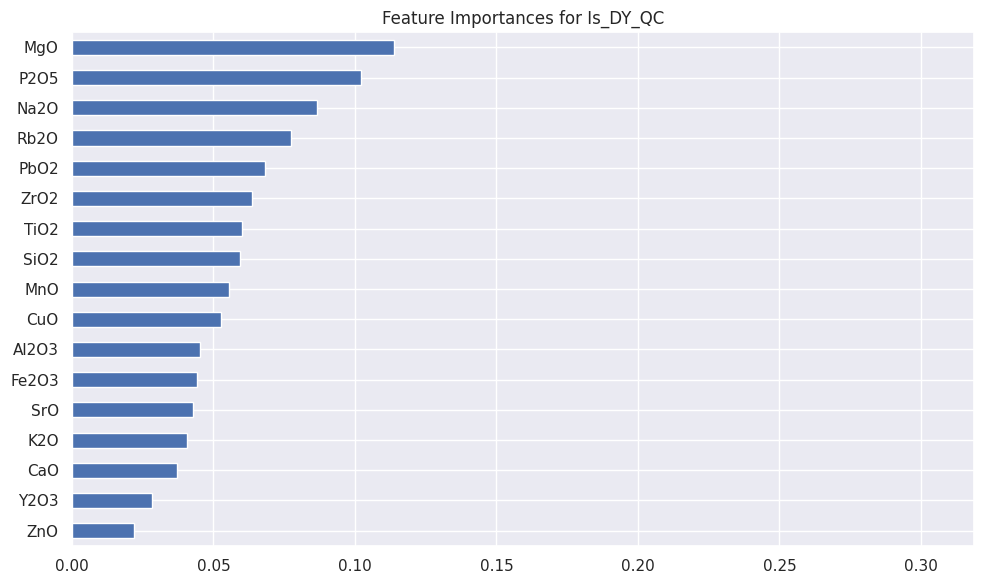

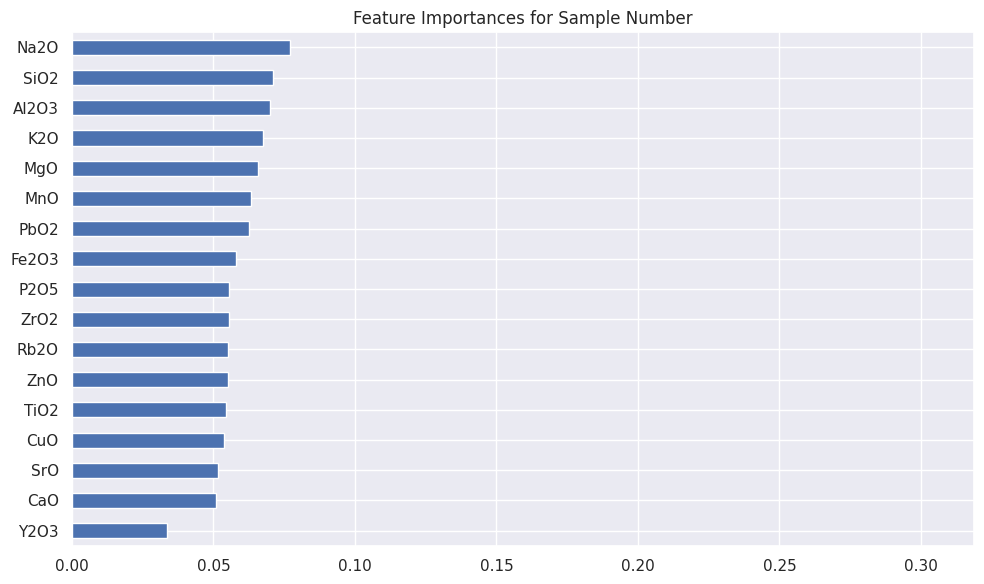

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = df_nums.drop(['Part', 'Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC', 'Sample Number'], axis=1)

targets = ['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC', 'Sample Number']

is_classifier = {target: target in ['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC'] for target in targets}

max_importance = 0
for target in targets:
    Y = df_nums[target]
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, Y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    max_importance = max(max_importance, feat_importances.max())

for target in targets:
    Y = df_nums[target]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, Y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances = feat_importances.sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    feat_importances.plot(kind='barh')
    plt.title(f'Feature Importances for {target}')
    plt.xlim(0, max_importance)
    plt.tight_layout()
    plt.show()


Возможные выводы:

- Принадлежность к FLQ или к DY явно зависит от содержания ZrO2
- Явных зависимостей подтипов с содержанием конкретных элементов не видно, но порядок самых важных элементов у всех типов отличается

# Выбор метрики для оценки качества кластеризации

1. У нас смешанные данные - категориальные и числовые.

2. Цель кластеризации: Выявить группы керамики со схожим химическим составом.

Учитывая эти факторы, будем использовать следующие метрики:

1. Silhouette Coefficient:
   - Подходит для смешанных данных
   - Не требует истинных меток
   - Оценивает как компактность кластеров, так и их разделимость
   - Значения от -1 до 1, где большие значения указывают на лучшую кластеризацию

   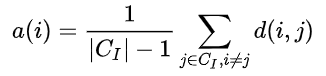
   
   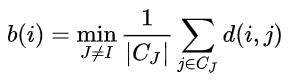

   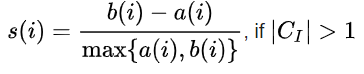



2. Calinski-Harabasz Index:
   - Хорошо работает с числовыми данными, которые преобладают в нашем наборе
   - Оценивает отношение межкластерного разброса к внутрикластерному
   - Большие значения указывают на лучшую кластеризацию

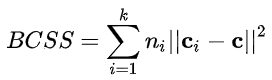

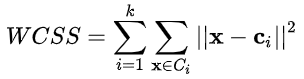

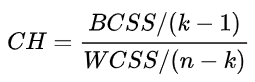

3. Davies-Bouldin Index:
   - Подходит для оценки компактности и разделимости кластеров
   - Меньшие значения указывают на лучшую кластеризацию

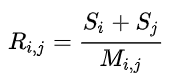

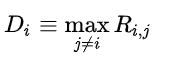

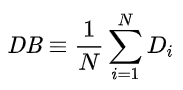

In [109]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [110]:
def calinski_harabasz_index(X, labels):
    n_samples, n_features = X.shape
    unique_labels = set(labels) # множество уникальных меток кластеров
    n_labels = len(unique_labels)

    if n_labels < 2:
        return float('nan') # Если число кластеров меньше двух, возвращается NaN, потому что индекс нельзя вычислить при одном или нуле кластеров

    extra_disp, intra_disp = 0., 0. # Инициализация переменных для накопления межкластерной дисперсии и внутрикластерной дисперсии
    mean = np.mean(X, axis=0) #Вычисление общего среднего вектора признаков для всех данных

    for k in unique_labels:
        if k == -1: # пропускаем шум
            continue
        cluster_k = X[labels == k] # Извлечение всех точек, принадлежащих кластеру k
        mean_k = np.mean(cluster_k, axis=0) # Вычисление среднего вектора для точек, принадлежащих кластеру k
        extra_disp += len(cluster_k) * np.sum((mean_k - mean) ** 2) # Увеличение межкластерной дисперсии на количество точек в кластере, умноженное на квадрат расстояния между средним вектором кластера mean_k и общим средним вектором mean.
        intra_disp += np.sum((cluster_k - mean_k) ** 2) # Увеличение внутрикластерной дисперсии на сумму квадратов расстояний между точками кластера и их средним значением mean_k

    return ((n_samples - n_labels) / (n_labels - 1)) * (extra_disp / intra_disp)

In [111]:
def silhouette_coefficient(X, labels):
    n_samples = X.shape[0]
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    if n_clusters < 2:
        return 0.0

    def mean_intra_cluster_distance(point_index, cluster_indexes):
        """
        Эта функция вычисляет среднее внутрикластерное расстояние для заданной точки point_index до остальных точек внутри её кластера
        """
        if len(cluster_indexes) == 1:
            return 0
        return np.mean([euclidean_distance(X[point_index], X[i]) for i in cluster_indexes if i != point_index]) #Если в кластере больше одной точки, вычисляется среднее евклидово расстояние от точки до остальных точек кластера

    def mean_nearest_cluster_distance(point_index, cluster_label):
        """
        Эта функция вычисляет среднее расстояние от заданной точки point_index до ближайшего кластера, отличного от текущего
        """
        other_clusters = [label for label in unique_labels if label != cluster_label and label != -1] # Составляется список других кластеров, исключая текущий кластер (cluster_label) и шумовые точки (метка -1)
        return min(np.mean([euclidean_distance(X[point_index], X[i])
                            for i in range(n_samples) if labels[i] == other_cluster])
                   for other_cluster in other_clusters) # Для каждого другого кластера вычисляется среднее расстояние от точки point_index до всех точек этого кластера, и выбирается минимальное из таких расстояний — это ближайший кластер

    silhouette_vals = []

    for i in range(n_samples):
        if labels[i] == -1:
            continue

        a = mean_intra_cluster_distance(i, [j for j in range(n_samples) if labels[j] == labels[i]])
        b = mean_nearest_cluster_distance(i, labels[i])

        silhouette_val = (b - a) / max(a, b)
        silhouette_vals.append(silhouette_val)

    silhouette_avg = np.mean(silhouette_vals) if silhouette_vals else 0.0

    return silhouette_avg

In [112]:
def davies_bouldin_index(X, labels):
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    if n_clusters < 2:
        return float('inf')
    n_samples, n_features = X.shape

    centroids = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        centroids.append(np.mean(cluster_points, axis=0))

    intra_dists = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            intra_dists[i] = np.mean([euclidean_distance(point, centroids[i]) for point in cluster_points])
        else:
            intra_dists[i] = 0

    db_index = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                inter_cluster_dist = euclidean_distance(centroids[i], centroids[j])
                if inter_cluster_dist == 0:
                    continue

                ratio = (intra_dists[i] + intra_dists[j]) / inter_cluster_dist
                max_ratio = max(max_ratio, ratio)
        db_index += max_ratio

    db_index /= n_clusters

    return db_index

In [113]:
def calculate_metrics(X, labels):
  metrics = {
      "Silhouette Coefficient": silhouette_coefficient(X, labels),
      "Davies-Bouldin Index": davies_bouldin_index(X, labels),
      "Calinski-Harabasz Index": calinski_harabasz_index(X, labels)
  }

  for metric, value in metrics.items():
      print(f"{metric}: {value:.3f}")

# Отбор признаков и нормирование

In [114]:
elements = ['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'Fe2O3', 'MnO', 'CuO', 'ZnO', 'PbO2', 'Rb2O', 'SrO', 'Y2O3', 'ZrO2', 'P2O5']

features = df_nums[elements]

In [115]:
Y = df_nums.drop(elements, axis=1)

In [116]:
class StandardScaler:
    def __init__(self):
        self.mean=None
        self.std =None

    def fit(self,X):
        self.mean= np.mean(X,axis=0)
        self.std= np.std(X,axis=0)
        return self

    def transform(self, X):
        return (X-self.mean)/self.std

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Кластеризация с помощью kmeans++

Основная проблема обычного k-means — это то, как он выбирает начальные центры кластеров. Так как выбор случайный, иногда результат получается плохим: некоторые центры могут оказаться слишком близко друг к другу, и тогда одна группа получается маленькой, а другая — слишком большой. Чтобы этого избежать, придумали k-means++.

Идея в том, чтобы умнее выбирать начальные центры. В k-means++ начальные центры выбираются не случайно, а с определенной логикой:

Первый центр выбирается случайно из всех точек.

Следующие центры выбираются так:

1.   Для каждой точки считаем, насколько она далеко от ближайшего уже выбранного центра.
2.   Чем дальше точка от ближайшего центра, тем больше вероятность, что она будет выбрана в качестве следующего центра.

In [118]:
import random, os

seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

PCA берет данные и пытается найти в них основные направления (главные компоненты), по которым они меняются.

In [119]:
def pca(X, n_components):
    X_centered = X - np.mean(X, axis=0) # Из каждого признака вычитается его среднее значение, чтобы каждый признак имел среднее равное нулю

    cov_matrix = np.cov(X_centered, rowvar=False) # Вычисление ковариационной матрицы для центрированных данных. Аргумент rowvar=False указывает, что каждая колонка соответствует одному признаку, а строки представляют наблюдения (объекты)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Вычисление собственных значений (eigenvalues) и собственных векторов (eigenvectors) ковариационной матрицы. Собственные значения показывают величину дисперсии вдоль соответствующих собственных векторов, которые указывают направления главных компонент.

    idx = eigenvalues.argsort()[::-1] # Сортировка индексов собственных значений в порядке убывания
    eigenvectors = eigenvectors[:, idx] # Перестановка собственных векторов в соответствии с отсортированными собственными значениями

    selected_eigenvectors = eigenvectors[:, :n_components] # Выбор первых n_components собственных векторов (главных компонент), которые объясняют наибольшую долю дисперсии в данных

    X_pca = np.dot(X_centered, selected_eigenvectors) # Проекция центрированных данных X_centered на выбранные главные компоненты с помощью скалярного произведения. Это уменьшает размерность данных до n_components измерений.
    return X_pca

In [120]:
n_components = 2
X_pca = pca(X, n_components)

In [121]:
def show_plot(X_pca, labels=None):
  plt.figure(figsize=(10, 8))

  if labels is not None:
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],c=labels,cmap='CMRmap')
  else:
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1])

  plt.xlabel('Первая главная компонента')
  plt.ylabel('Вторая главная компонента')
  plt.colorbar(scatter)
  plt.show()

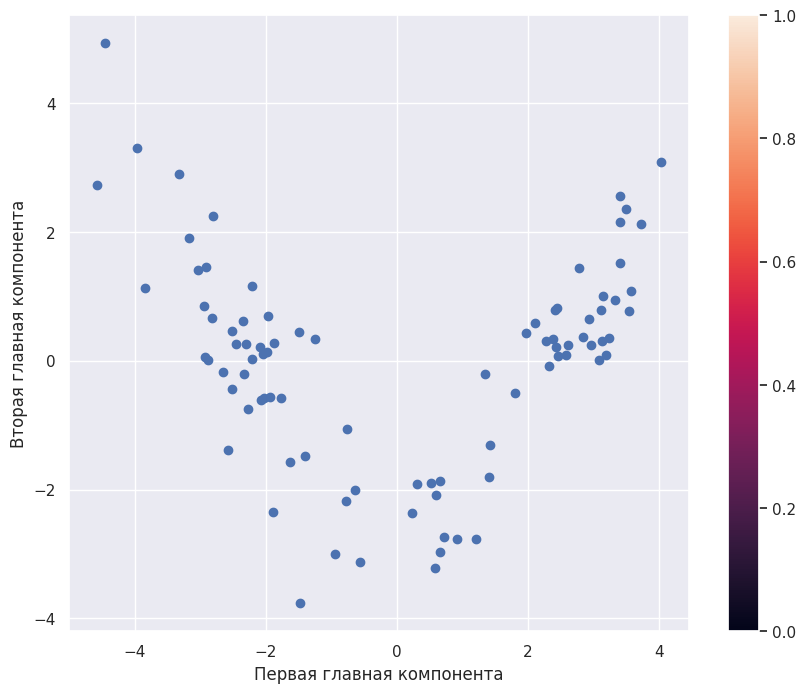

In [122]:
show_plot(X_pca)

In [123]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol #  порог остановки алгоритма: если центроиды изменяются менее чем на это значение, итерации прекращаются

    def initialize_centroids(self, X):
        centroids = [X[np.random.randint(X.shape[0])]] # выбирается первая случайная точка из данных как первый центроид
        for _ in range(1, self.n_clusters):
            dist_sq = np.array([min([euclidean_distance(c, x)**2 for c in centroids]) for x in X]) #  вычисляются квадратные минимальные расстояния от каждой точки до ближайшего центроида
            probs = dist_sq / dist_sq.sum() #  вероятность выбора следующего центроида пропорциональна квадрату расстояния
            cumulative_probs = probs.cumsum()
            r = np.random.rand() # выбирается случайное значение, и следующий центроид выбирается по этому значению из распределения вероятностей
            i = np.where(cumulative_probs >= r)[0][0]
            centroids.append(X[i])
        return np.array(centroids)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()

            distances = np.array([[euclidean_distance(x, c) for c in self.centroids] for x in X]) # вычисляются расстояния от каждой точки до всех центроидов
            self.labels = np.argmin(distances, axis=1) #  каждая точка назначается к кластеру с ближайшим центроидом

            for i in range(self.n_clusters):
                cluster_points = X[self.labels == i]
                if len(cluster_points) > 0:
                    self.centroids[i] = np.mean(cluster_points, axis=0)

            if np.all(np.abs(old_centroids - self.centroids) < self.tol): # проверка на сходимость: если центроиды изменились незначительно, алгоритм завершает работу
                break

    def evaluate(self, X):
        distances = np.array([[euclidean_distance(x, c) for c in self.centroids] for x in X]) # вычисляются расстояния от каждой точки до центроидов
        labels = np.argmin(distances, axis=1) # каждая точка получает метку на основе ближайшего центроида
        return self.centroids, labels

In [124]:
data = X.to_numpy()

## 2 кластера

Silhouette Coefficient: 0.286
Davies-Bouldin Index: 1.412
Calinski-Harabasz Index: 39.486


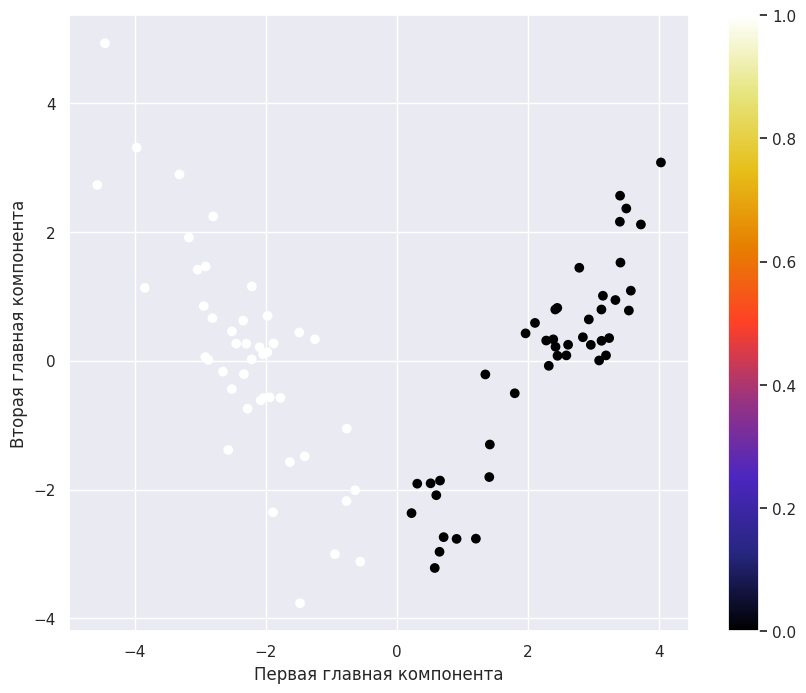

In [125]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [126]:
df['Cluster'] = labels

class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
0            13         7         8        9        3         4
1            13         7         8        9        3         4
         Body  Glaze
Cluster             
0          44      0
1           0     44


## 3 кластера

Silhouette Coefficient: 0.268
Davies-Bouldin Index: 1.471
Calinski-Harabasz Index: 33.463


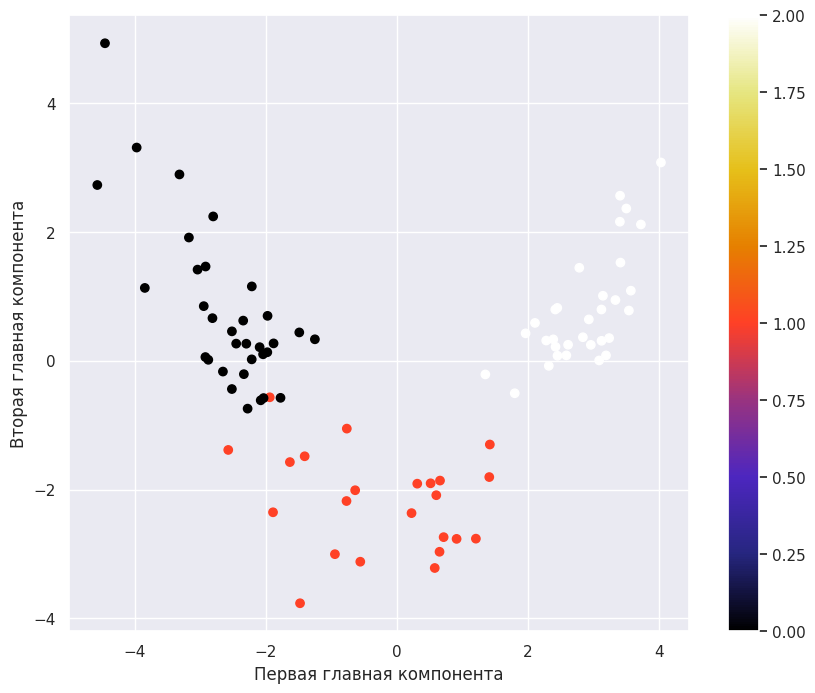

In [127]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [128]:
df['Cluster'] = labels

class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
0             2         7         8        9        3         4
1            23         0         0        0        0         0
2             1         7         8        9        3         4
         Body  Glaze
Cluster             
0           0     33
1          12     11
2          32      0


## 4 кластера

Silhouette Coefficient: 0.232
Davies-Bouldin Index: 1.510
Calinski-Harabasz Index: 26.374


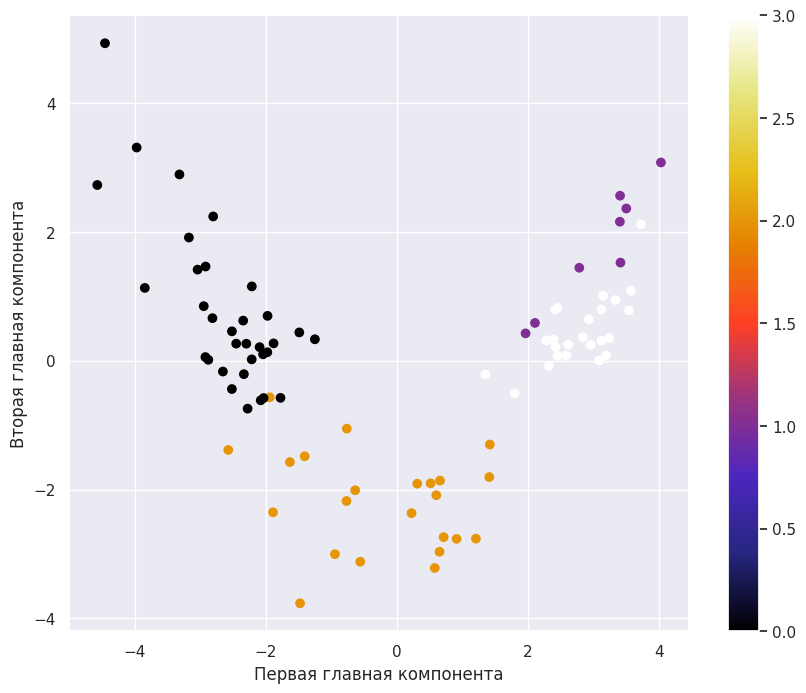

In [129]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [130]:
df['Cluster'] = labels

class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
0             2         7         8        9        3         4
1             1         0         4        3        0         0
2            23         0         0        0        0         0
3             0         7         4        6        3         4
         Body  Glaze
Cluster             
0           0     33
1           8      0
2          12     11
3          24      0


## 5 кластеров

Silhouette Coefficient: 0.239
Davies-Bouldin Index: 1.449
Calinski-Harabasz Index: 21.898


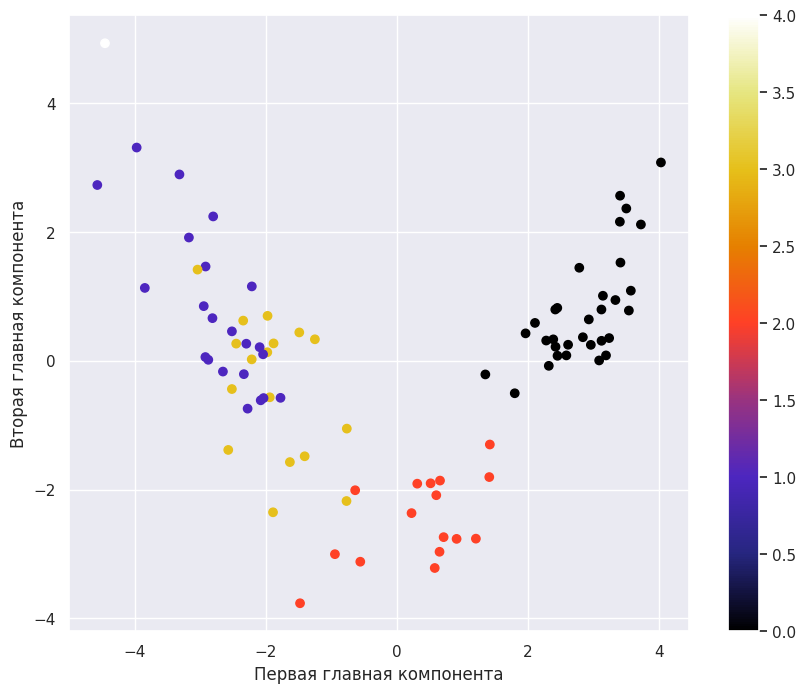

In [131]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [132]:
df['Cluster'] = labels

class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
0             1         7         8        9        3         4
1             0         7         5        5        2         3
2            16         0         0        0        0         0
3             9         0         3        4        0         1
4             0         0         0        0        1         0
         Body  Glaze
Cluster             
0          32      0
1           0     22
2          12      4
3           0     17
4           0      1


## 6 кластеров

Silhouette Coefficient: 0.230
Davies-Bouldin Index: 1.624
Calinski-Harabasz Index: 21.608


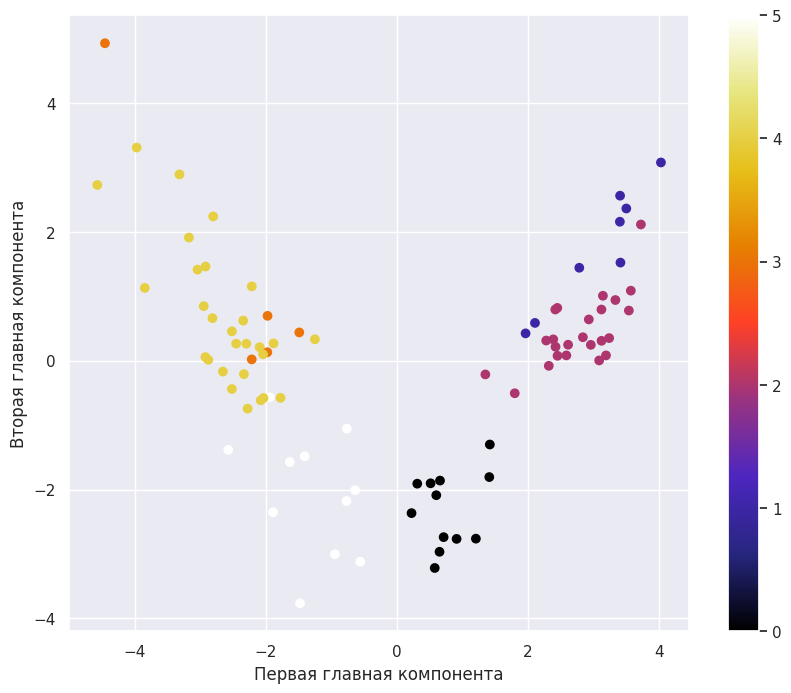

In [133]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
class_centers, labels = kmeans.evaluate(data)
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [134]:
df['Cluster'] = labels

class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
0            12         0         0        0        0         0
1             1         0         4        3        0         0
2             0         7         4        6        3         4
3             2         0         0        2        1         0
4             0         7         8        7        2         4
5            11         0         0        0        0         0
         Body  Glaze
Cluster             
0          12      0
1           8      0
2          24      0
3           0      5
4           0     28
5           0     11


# Кластеризация с помощью DBSCAN

In [135]:
from collections import defaultdict

def dbscan(data, eps, min_samples):
    def region_query(point, eps):
        """
        функция для поиска точек, попадающих в окрестность радиусом eps вокруг точки point
        """
        return [i for i, p in enumerate(data) if np.linalg.norm(point - p) <= eps]

    def expand_cluster(point_idx, neighbors, cluster_id):
        """
        Расширяет кластер, добавляя в него точки, которые связаны по плотности
        """
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if labels[neighbor] == -1:
                labels[neighbor] = cluster_id
                new_neighbors = region_query(data[neighbor], eps)
                if len(new_neighbors) >= min_samples:
                    neighbors.extend(new_neighbors)
            i += 1

    labels = [-1] * len(data)
    cluster_id = 0

    for point_idx, point in enumerate(data):
        if labels[point_idx] != -1:
            continue
        neighbors = region_query(point, eps)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            cluster_id += 1
            expand_cluster(point_idx, neighbors, cluster_id)

    return np.array(labels)

In [136]:
eps = 2.5
min_samples = 5

labels = dbscan(data, eps, min_samples)

if np.all(labels == -1):
    print("Все точки помечены как шум")
else:
    df['Cluster'] = labels

Silhouette Coefficient: 0.421
Davies-Bouldin Index: 0.613
Calinski-Harabasz Index: 54.019


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


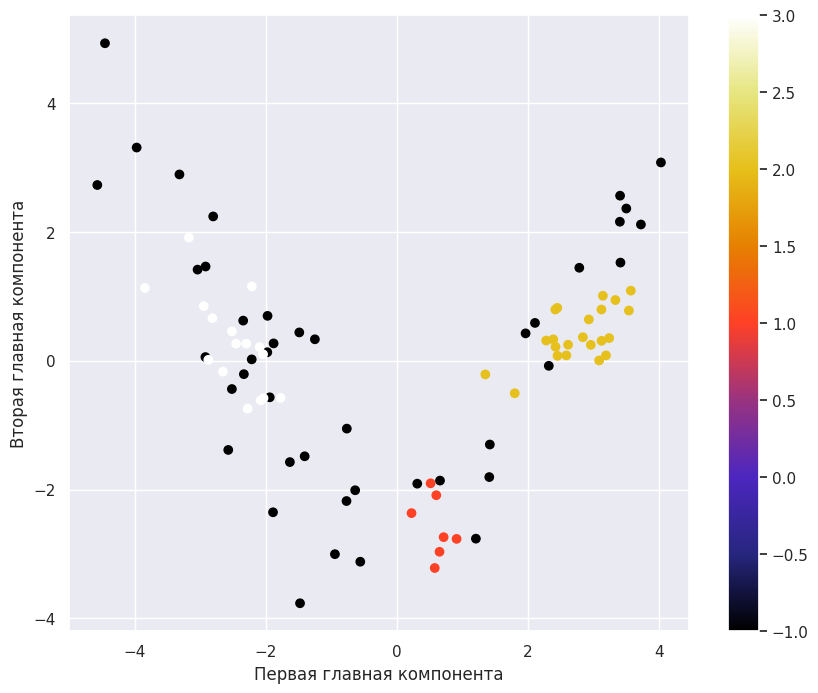

In [137]:
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [138]:
class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
-1           19         5         8        7        2         2
 1            7         0         0        0        0         0
 2            0         6         4        6        3         3
 3            0         3         4        5        1         3
         Body  Glaze
Cluster             
-1         15     28
 1          7      0
 2         22      0
 3          0     16


## Grid Search

In [139]:
def optimize_dbscan_params_silhouette(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            labels = dbscan(data, eps=eps, min_samples=min_samples)

            if len(set(labels)) > 1 and -1 in labels:
                score = silhouette_coefficient(data, labels) if len(set(labels)) > 1 else -1

                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_labels = labels

    return best_params, best_labels, best_score

In [140]:
def optimize_dbscan_params_davies_bouldin(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {'eps': None, 'min_samples': None}
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            labels = dbscan(data, eps=eps, min_samples=min_samples)

            if len(set(labels)) > 1 and -1 in labels:
                score = -davies_bouldin_index(data, labels)

                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_labels = labels

    return best_params, best_labels, best_score

In [141]:
eps_values = np.linspace(0.1, 2.0, 10)
min_samples_values = range(2, 10)

best_params, best_labels, best_score = optimize_dbscan_params_silhouette(data, eps_values, min_samples_values)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'eps': 1.788888888888889, 'min_samples': 3}
Best Score: 0.5213700186119814


In [142]:
best_params, best_labels, best_score = optimize_dbscan_params_davies_bouldin(data, eps_values, min_samples_values)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Best Parameters: {'eps': 1.788888888888889, 'min_samples': 3}
Best Score: -0.0


In [143]:
eps = 2.278
min_samples1 = 7
min_samples2 = 5

labels = dbscan(data, eps, min_samples1)

if np.all(labels == -1):
    print("Все точки помечены как шум")
else:
    df['Cluster'] = labels

Silhouette Coefficient: 0.600
Davies-Bouldin Index: 0.000
Calinski-Harabasz Index: 148.215


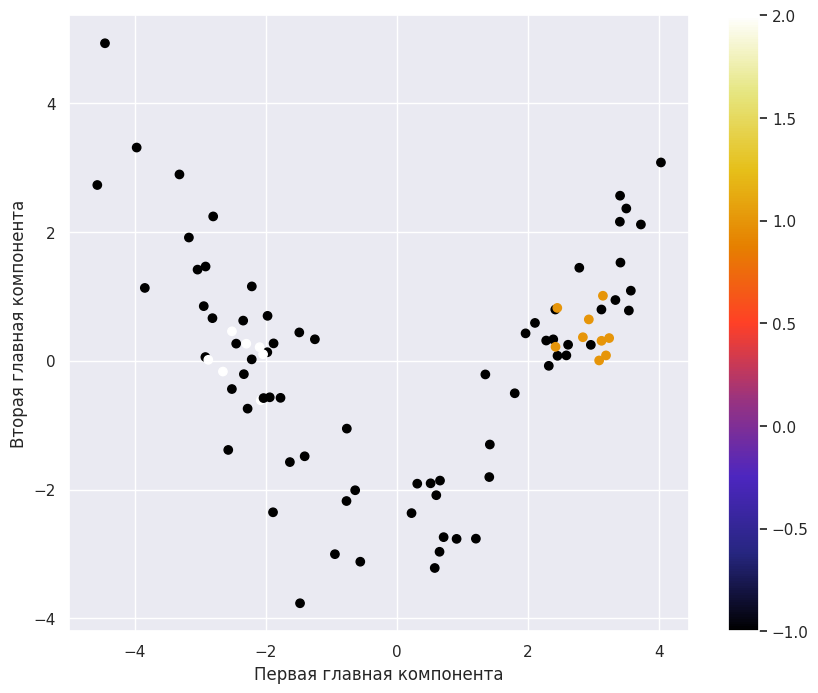

In [144]:
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [145]:
class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
-1           26        12        13       13        3         5
 1            0         1         1        3        2         2
 2            0         1         2        2        1         1
         Body  Glaze
Cluster             
-1         35     37
 1          9      0
 2          0      7


In [146]:
labels = dbscan(data, eps, min_samples2)

if np.all(labels == -1):
    print("Все точки помечены как шум")
else:
    df['Cluster'] = labels

Silhouette Coefficient: 0.548
Davies-Bouldin Index: 0.000
Calinski-Harabasz Index: 101.586


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


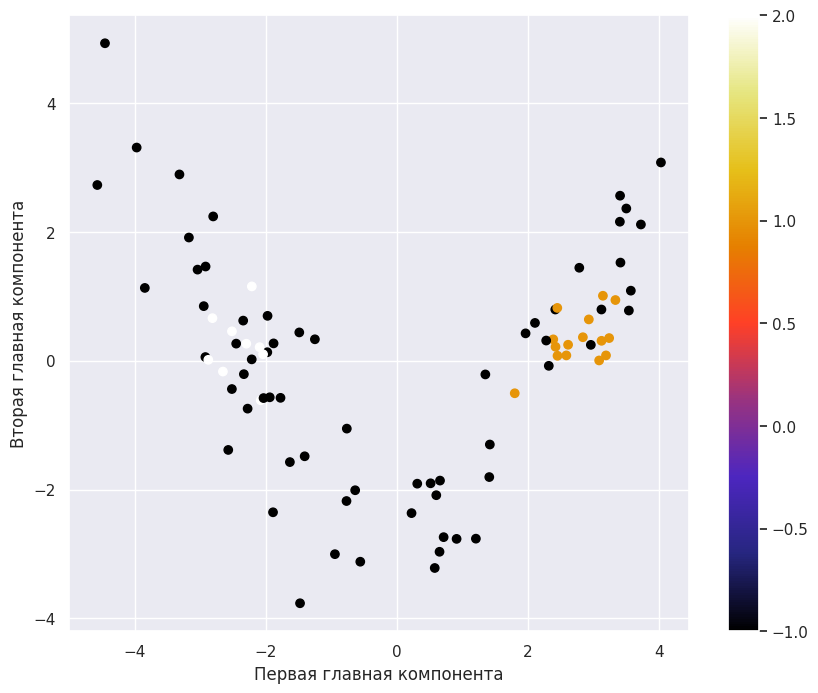

In [147]:
calculate_metrics(data, labels)
show_plot(X_pca, labels=labels)

In [148]:
class_counts = df.groupby('Cluster')[['Is_FLQ', 'Is_DY_BS', 'Is_DY_NS', 'Is_DY_Y', 'Is_DY_M', 'Is_DY_QC']].sum()

part_counts = df.groupby(['Cluster', 'Part']).size().unstack(fill_value=0)

part_counts.columns = ['Body', 'Glaze']

print(class_counts)
print(part_counts)

         Is_FLQ  Is_DY_BS  Is_DY_NS  Is_DY_Y  Is_DY_M  Is_DY_QC
Cluster                                                        
-1           26         8        11       13        3         3
 1            0         4         3        3        2         3
 2            0         2         2        2        1         2
         Body  Glaze
Cluster             
-1         29     35
 1         15      0
 2          0      9


Оптимальные параметры DBSCAN: eps = 2.3, min_examples = 5.

---

